# PDAN8411w TASK 2: CLASSIFICATION AND MODEL IMPROVEMENT


**Dataset Source:**<br>
Qureshi,M.2021. Spam Email, Kaggle.[Online]. Available at: <br>
https://www.kaggle.com/datasets/mfaisalqureshi/spam-email/code

**Naive Bayes:**<br>
Naïve Bayes is a Supervised Learning classification algorithm that is mostly used in text classification. The Naïve Bayes algorithm comes from the Bayes theorem of conditional probability and for text analysis, it calculates the probability of common words being spam/ham given that they have appeared in spam messages before. The reason why this algorithm is ‘Naïve’ is because it treats all word orders the same and does not take into account grammar and/or the way words are arranged. 

**Why this dataset:**<br>
The chosen dataset for this assignment is a SPAM detection dataset,and spam detection is a classification problem. I chose this because, as mentioned above, Naïve Bayes thrives in text classification. Naive Bayes has different classifiers but to build a model with this dataset I will use the Multinomial Naïve Bayes. This classifier is mostly suitable for this dataset as it works well with Imbalanced datasets, and works well with discrete data in text classification (Target variable labeled as 0’s and 1’s). This dataset is imbalanced because there is a significantly low amount of SPAM classification in the target column(‘Category’) than there are non-spam records, which are classified as Ham in this dataset.
The Analysis of this dataset aims at classifying received messages as either spam or no spam. Emails and messages are flooded with spam, which more often can be malicious and therefore there’s a great need to have good spam detection models to avoid spam messages/emails and this model aims at achieving that goal.

**Libraries**<br>
Pandas - To be able to convert this text file dataset into a Dataframe<br>
Numpy - For Exploratory Data Analysis<br>
Matplotlib and Seaborn - These will be used for the visualisation of the data<br>
Scikitlearn - For the Machine Learning (Linear regression) model I will be building<br>
Naive bayes (Multinomial) - The actual Naive Bayes Algorithm

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

## 1. GETTING AND MEETING THE DATA
First,in this section we load the dataset that we will be working with,the change it into a Dataframe and view what the data looks like.

In [136]:
#Loading the dataset
df=pd.read_csv("spam.csv")

In [137]:
#Converting the dataset into a dataframe
spam_data=pd.DataFrame(df)

In [138]:
#Meeting the data
spam_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## 2. EXPLORATORY DATA ANALYSIS(EDA)
In this section we explore the data by looking at the data facts like Info, Describing the data, Unique values, Duplicate values,null values etc. These facts help determine how the data should then be manipulated.
Next in the section is the data manipulation based on facts from the EDA, this includes removing duplicated values,dropping null values(if any).
Lastly, this section also looks at the visualisation of the data in this datasets.This gives us a better view of how the target column is spread between the different(negative/positive) target values.

In [139]:
#dataset description gives a view of what the columns are, how many values are in each column,if there are any unique values,and what the most frequented values is for each column
spam_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [140]:
#dataset info gives an overview of how many rows/entries are in the dataset,what the data types are for each column,and whether or not there are null values.
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [141]:
#counting the different values in the Category(target column) to see how many times each value appears.
spam_data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [142]:
#Showing unique values, this also tell us that there are duplicated values if the unique value count is not equal to the total number of datapoints
spam_data.nunique(axis=0)

Category       2
Message     5157
dtype: int64

In [143]:
spam_data.duplicated().values.any()

True

In [144]:
#As seen above, there are 5157 unique values out of 5572 variables on the Message column,that means that 415 Values are duplicates
spam_data.duplicated().sum()

415

In [145]:
#showing the duplicate rows
duplicates = spam_data[spam_data.duplicated(subset=['Message'])]
duplicates

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [146]:
#Removing duplicates
spam_data.drop_duplicates(inplace=True)

In [147]:
spam_data.shape

(5157, 2)

In [148]:
#checking for null values
spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

<AxesSubplot:title={'center':'Spam or Ham Statistics'}>

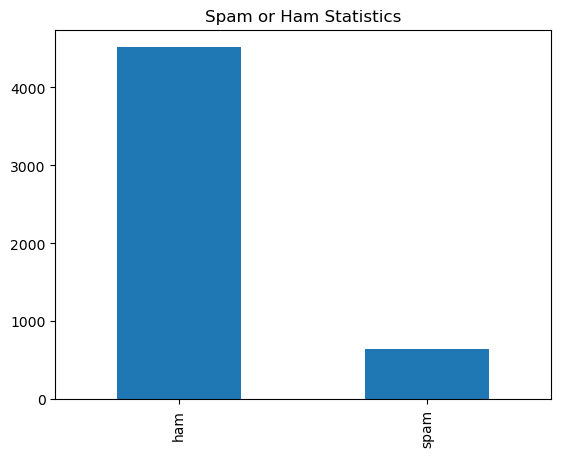

In [149]:
#Visualising the data on a bar plot,looking at how much of the data is spam and how much is not spam.From this bar graph we can clearly see we have more ham than spam,the data is imbalanced.
spam_data['Category'].value_counts().plot(kind='bar', title="Spam or Ham Statistics")

([<matplotlib.patches.Wedge at 0x1c62c105640>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57%'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43%')])

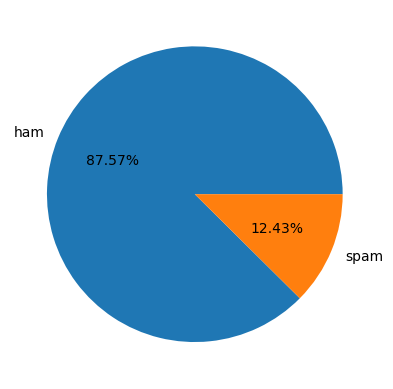

In [150]:
#We can see from the pie plot below that the ham categry is only a slice out of the whole pie.Spam is only 12% of the dataset
plt.pie(spam_data["Category"].value_counts(), labels=["ham", "spam"],autopct='%.2f%%')

## 3. DATA PREPROCESSING
In this section we prepare or preprocess the data, getting it ready for the model.
Before a model is trained, the data is arranged in a manner that the model can accept.And for this model this is done in the following steps:<br>
3.1.The target column(y) and independant column(X) are defined<br>
3.2.The target column is of categorical nature,and it's converted to numerical using a Label Encoder<br>
3.3.Dataset is split into training and testing sets<br>
3.4.Feature Engineering is done on the Categorical column(X) by converting the values into numerical representations using a Vectoriser.


In [151]:
#defining the target column
X=spam_data['Message']
y=spam_data['Category']

In [152]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [153]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5157, dtype: object

In [154]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [155]:
y_encoded=Encoder.fit_transform(y)

In [156]:
y_encoded

array([0, 0, 1, ..., 0, 0, 0])

In [157]:
y_encoded.shape

(5157,)

In [158]:
#Splitting dataset to training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.25)

In [159]:
#Importing vectoriser to convert textual columns into numerical values that can fit into the model.
from sklearn.feature_extraction.text import CountVectorizer

In [160]:
vect=CountVectorizer()

In [161]:
#Transforming the X column using the vectoriser
vct_Xtrain= vect.fit_transform(X_train)

In [162]:
vct_Xtest= vect.transform(X_test)

## 4. TRAINING A MODEL - NAIVE BAYES(Multinomial)
In this section we train the model following the steps below:<br>
4.1 Our chosen Naive Bayes algorithm(Multinomial) is imported,and the model is trained.<br>
4.2 Two examples are also introduced, 1 being a spam message and another being a non-spam(ham) message and using the trained model to predict this new data.<br>
4.3 Training and testing scores are also shown in this section<br>
4.4 The performance of the model is assessed using a Classification report<br>

In [163]:
#Importing the algorithm
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()

In [164]:
#Training the model
Training=MNB.fit(vct_Xtrain,y_train)

In [165]:
#Getting the training scores
Training_score=Training.score(vct_Xtrain,y_train)
Training_score

0.9937936384794415

In [166]:
#Introducing new data, example 1(spam)
Test_message=['Congratulations,you have been selected for a credit increase,click on the link below to action']

In [167]:
vct_TestMessage=vect.transform(Test_message)

In [168]:
MNB.predict(vct_TestMessage)

array([1])

In [169]:
#Example2(ham)
Test_msg=['I love you so much, I hope you have a lovely day']

In [170]:
vct_TestMsg=vect.transform(Test_msg)

In [171]:
MNB.predict(vct_TestMsg)

array([0])

In [172]:
#Using the model to predict on test data
y_prediction =MNB.predict(vct_Xtest)

In [173]:
#Getting the testing scores
from sklearn.metrics import accuracy_score

In [174]:
Testing_score=accuracy_score(y_test, y_prediction)
Testing_score

0.9790697674418605

In [175]:
from sklearn.metrics import classification_report

In [176]:
classification_report(y_test, y_prediction)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      1124\n           1       0.97      0.87      0.91       166\n\n    accuracy                           0.98      1290\n   macro avg       0.97      0.93      0.95      1290\nweighted avg       0.98      0.98      0.98      1290\n'

### As seen on the model above, the model has high training and testing scores.It also performed well with the new data that was introduced and predicted it correctly as spam and ham.The classification report above also shows that the precision,recall and f1 score are pretty high.Overall this model is perfoming well.

## 5. TRAINING A MODEL -KNN
In this section we train the model using the K-Neighbours classifier algorithm.The aim is to compare this algorithm's perfomance with the Naive Bayes's algorithm that was used above.And find the most suitable algrithm for this classification dataset.

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
knn=KNeighborsClassifier(n_neighbors=5)

In [179]:
X_train.shape

(3867,)

In [180]:
X_test.shape

(1290,)

In [181]:
y_encoded.shape

(5157,)

In [182]:
TrainingKNN=knn.fit(vct_Xtrain,y_train)

In [183]:
TrainingKNN.score(vct_Xtrain,y_train)

C:\Users\Ldinisile\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9288854409102664

In [184]:
y_pred = knn.predict(vct_Xtest)

C:\Users\Ldinisile\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [185]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [186]:
TestingKNN_score=accuracy_score(y_test, y_pred)

In [187]:
TestingKNN_score

0.9100775193798449

### As seen above,the KNN model has a 92% accuracy on this dataset, which is lower that the accuracy of the model built using the Multinomial Naive Bayes.<br>Based on these results,i can conclude that Naive Bayes performs better in text classification and is a better algorithm to use for SPAM detection models.